# Tutorial for DLD sectors alignment using photon peak

## Preparation

### Import necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

import sys

# # Somehow here, we need to add this directory...
from os.path import dirname
sys.path.append('/home/kutnyakd/sed_v1/sed/src/')

from pathlib import Path
import os

from sed import SedProcessor
import sed
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib widget

from lmfit.models import GaussianModel

### Get data paths

If it is your beamtime, you can read the raw data and write to the processed directory. For the public data, you can not write to the processed directory.

The paths are such that if you are on Maxwell, it uses those. Otherwise, data is downloaded in the current directory from Zenodo:
https://zenodo.org/records/15011781

In [2]:
beamtime_dir = "/asap3/flash/gpfs/pg2/2021/data/11010004" # on Maxwell
if os.path.exists(beamtime_dir) and os.access(beamtime_dir, os.R_OK):
    path = beamtime_dir + "/raw/hdf/FL1USER3"
    buffer_path = beamtime_dir + "/processed/tutorial/"
else:
    # data_path can be defined and used to store the data in a specific location
    dataset.get("Photon_peak") # Put in Path to a storage of at least 10 GByte free space.
    path = dataset.dir
    buffer_path = path + "/processed/"

### Config setup

Here, we get the path to the config file and set up the relevant directories. This can also be done directly in the config file.

In [3]:
# pick the default configuration file for hextof@FLASH
config_file = Path('../src/sed/config/flash_example_config.yaml')
assert config_file.exists()

In [4]:
# here we setup a dictionary that will be used to override the path configuration
config_override = {
    "core": {
        "beamtime_id": 11010004,
        "paths": {
            "raw": path,
            "processed": buffer_path
        },
    },
}

### Read data

In [5]:
config = 'Monney_2021-v1.yaml'

In [6]:
### Probably due to the fact that this data from 2021's beamtime all channels are different
### to what we have now in the 'flash_example_config.yaml' and with this configuration while
### creating new buffer files I'm getting error "Channels not in file",
### that is why I tested it with cell below using original beamtime config and already converted files
# run_number = 40887
# sp_ph_peak = SedProcessor(runs=[run_number], config=config_override, system_config=config_file, verbose=True)
# sp_ph_peak.add_jitter()

In [7]:
run_number = 40887
sp_ph_peak = SedProcessor(runs=[run_number], config=config, verbose=True)
sp_ph_peak.add_jitter()

INFO - Configuration loaded from: [/home/kutnyakd/sed_v1/sed/tutorial/Monney_2021-v1.yaml]
INFO - Folder config loaded from: [/home/kutnyakd/sed_v1/sed/tutorial/sed_config.yaml]
INFO - Default config loaded from: [/home/kutnyakd/sed_v1/sed/src/sed/config/default.yaml]
INFO - Reading files: 0 new files of 17 total.
loading complete in  4.31 s
INFO - add_jitter: Added jitter to columns ['dldPosX', 'dldPosY', 'dldTimeSteps'].


Check which channels are included in the dataframe

In [8]:
sp_ph_peak.dataframe.compute()

,trainId,pulseId,electronId,dldPosX,dldPosY,dldTimeSteps,bam,timeStamp,monochromatorPhotonEnergy,delayStage,opticalDiode,sampleBias,tofVoltage,extractorVoltage,extractorCurrent,cryoTemperature,sampleTemperature,dldTimeBinSize,dldSectorID
0,1180494851,450,0,678.478835,745.478835,2390.478835,4.456073,1.632811e+09,495.19931,1762.757202,2.007983,600.002441,29.99966,0.626408,-0.103807,252.789993,259.619995,0.020576,3
1,1180494851,450,1,671.995891,751.995891,2390.995891,4.456073,1.632811e+09,495.19931,1762.757202,2.007983,600.002441,29.99966,0.626408,-0.103807,252.789993,259.619995,0.020576,0
2,1180494856,43,0,815.199282,653.199282,4276.199282,-48.129810,1.632811e+09,495.19931,1762.757324,2.011839,600.002441,29.99966,0.626408,-0.103807,252.789993,259.619995,0.020576,7
3,1180494856,43,1,809.937833,652.937833,4276.937833,-48.129810,1.632811e+09,495.19931,1762.757324,2.011839,600.002441,29.99966,0.626408,-0.103807,252.789993,259.619995,0.020576,6
4,1180494859,2169,0,884.122049,634.122049,4421.122049,29.768145,1.632811e+09,495.19931,1762.757324,2.011839,600.002441,29.99966,0.570388,-0.103371,252.789993,259.619995,0.020576,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,1180513603,3,1,648.689703,651.689703,2388.689703,31.918148,1.632813e+09,495.19931,1762.759399,2.006376,599.996521,29.99966,-0.896119,-0.104243,255.000000,261.660004,0.020576,4
846,1180513603,104,0,620.793692,536.793692,4604.793692,31.918148,1.632813e+09,495.19931,1762.759399,2.006376,599.996521,29.99966,-0.896119,-0.104243,255.000000,261.660004,0.020576,5
847,1180513603,104,1,620.663239,537.663239,4603.663239,31.918148,1.632813e+09,495.19931,1762.759399,2.006376,599.996521,29.99966,-0.896119,-0.104243,255.000000,261.660004,0.020576,4
848,1180513603,278,0,739.413920,873.413920,2712.413920,-17.687613,1.632813e+09,495.19931,1762.759399,2.006376,599.996521,29.99966,-0.896119,-0.104243,255.000000,261.660004,0.020576,3


## Data w/o correction of quadrants in time

First, we take a look at the photon peak and apply separation by single quadrants before any corrections. We plot the data in detector time (dldTimeSteps) as well as in detector position (dldPosX and dvlPosY) coordinates with additional separation by single sectors.

  0%|          | 0/1 [00:00<?, ?it/s]

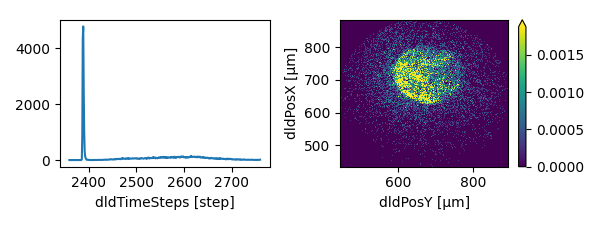

In [9]:
axes = ['dldSectorID', 'dldTimeSteps','dldPosX','dldPosY']
ranges = [[0,8], [2360,2760], [435,885], [445,895]]
bins = [8,400,225,225]
res_ph_peak = sp_ph_peak.compute(bins=bins, axes=axes, ranges=ranges)

res_ph_peak['dldPosX'].attrs['unit'] = 'µm'
res_ph_peak['dldPosY'].attrs['unit'] = 'µm'

fig,ax = plt.subplots(1,2,figsize=(6,2.25), layout='tight')
res_ph_peak.sum(('dldSectorID','dldPosX','dldPosY')).plot(ax=ax[0])
res_ph_peak.mean(('dldSectorID','dldTimeSteps')).plot(ax=ax[1], robust=True)

### time-of-flight spectrum
To see the photon peak on the ns scale we plot the time-of-flight spectrum. This is done here.

In [10]:
sp_ph_peak.append_tof_ns_axis()

INFO - Adding time-of-flight column in nanoseconds to dataframe.
INFO - Dask DataFrame Structure:
               trainId pulseId electronId  dldPosX  dldPosY dldTimeSteps      bam timeStamp monochromatorPhotonEnergy delayStage opticalDiode sampleBias tofVoltage extractorVoltage extractorCurrent cryoTemperature sampleTemperature dldTimeBinSize dldSectorID  dldTime
npartitions=17                                                                                                                                                                                                                                                             
                uint32   int64      int64  float64  float64      float64  float32   float64                   float32    float32      float32    float32    float32          float32          float32         float32           float32        float32        int8  float64
                   ...     ...        ...      ...      ...          ...      ...       ...       

  0%|          | 0/1 [00:00<?, ?it/s]

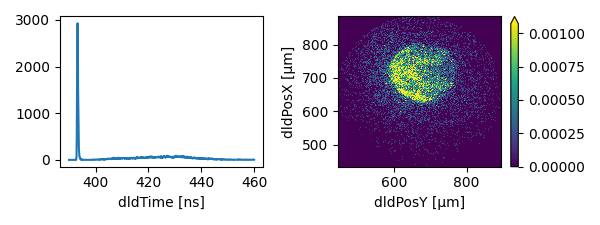

In [11]:
axes = ['dldSectorID', 'dldTime','dldPosX','dldPosY']
ranges = [[0,8], [390,460], [435,885], [445,895]]
bins = [8,700,225,225]
res_ph_peak_ns = sp_ph_peak.compute(bins=bins, axes=axes, ranges=ranges)

res_ph_peak_ns['dldPosX'].attrs['unit'] = 'µm'
res_ph_peak_ns['dldPosY'].attrs['unit'] = 'µm'

fig,ax = plt.subplots(1,2,figsize=(6,2.25), layout='tight')
res_ph_peak_ns.sum(('dldSectorID','dldPosX','dldPosY')).plot(ax=ax[0])
res_ph_peak_ns.mean(('dldSectorID','dldTime')).plot(ax=ax[1], robust=True)

Just photon peak itself without surrounding background

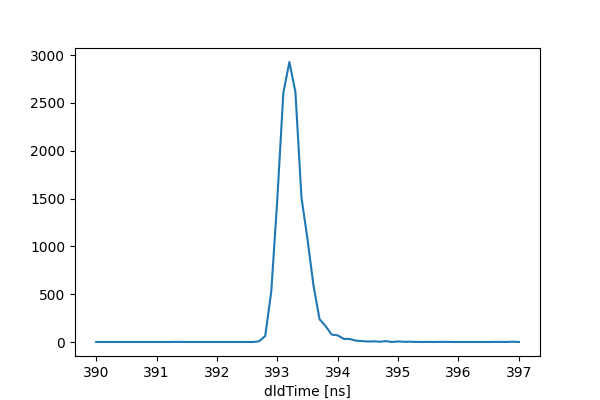

In [12]:
ph_peak_ns = res_ph_peak_ns.sel(dldTime=slice(390,397)).sum(('dldPosX','dldPosY'))
plt.figure(figsize=(6,4))
ph_peak_ns.sum('dldSectorID').plot()
plt.show()

Let's check the signal (photon peak) from every single sector

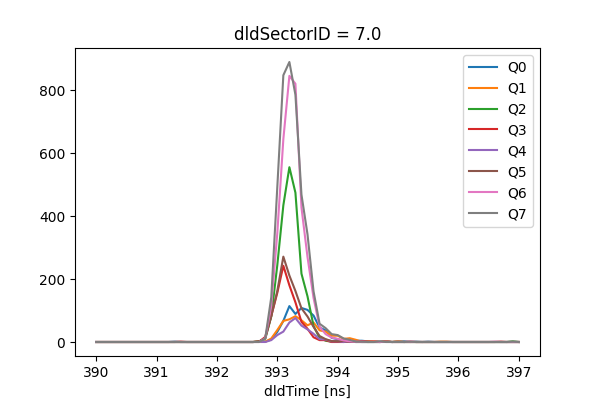

In [13]:
plt.figure(figsize=(6,4))
for i, item in enumerate(ph_peak_ns):
    item.plot(label=f'S{i}')
    plt.legend()

### Width of the photon peak

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 71
    # variables        = 3
    chi-square         = 315470.434
    reduced chi-square = 4639.27109
    Akaike info crit   = 602.338966
    Bayesian info crit = 609.127006
    R-squared          = 0.98776583
[[Variables]]
    amplitude:  1360.68324 +/- 21.3487677 (1.57%) (init = 1360)
    center:     393.214596 +/- 0.00334756 (0.00%) (init = 393.2)
    sigma:      0.18475542 +/- 0.00334743 (1.81%) (init = 0.19)
    fwhm:       0.43506575 +/- 0.00788259 (1.81%) == '2.3548200*sigma'
    height:     2938.12281 +/- 46.1018814 (1.57%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = +0.5773


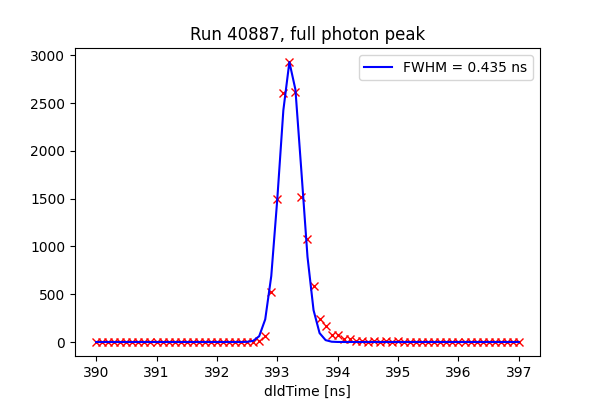

In [14]:
Gauss_mod = GaussianModel()

x=ph_peak_ns['dldTime']
y=ph_peak_ns.sum('dldSectorID')

pars = Gauss_mod.make_params(amplitude=1360.0, center=393.2, sigma=0.19)
# pars = Gauss_mod.guess(y, x=x)
out = Gauss_mod.fit(y, pars, x=x)

print(out.fit_report())
plt.figure(figsize=(6,4))
plt.plot(x,y, 'rx')
plt.plot(x,out.best_fit, "b", label="FWHM = {:.3f} ns".format(out.values['fwhm']))
plt.title(f'Run {run_number}, full photon peak')
plt.legend(loc="best")
plt.xlabel("dldTime [ns]")
plt.show()

Width of the photon peak from every quadrant and they offset in ps in respect to 0 quadrant

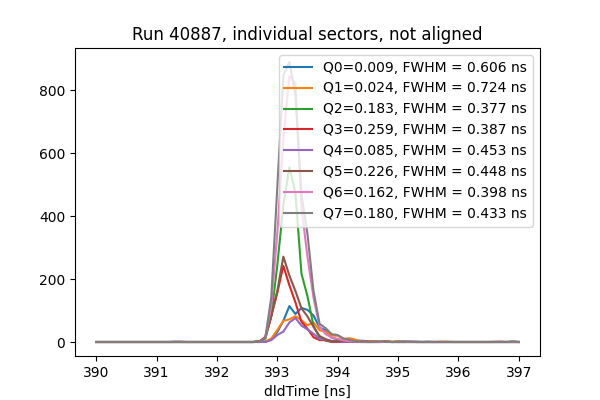

In [15]:
plt.figure(figsize=(6,4))
for i, item in enumerate(ph_peak_ns):
    x=ph_peak_ns['dldTime']
    y=item
    pars = Gauss_mod.make_params(amplitude=800.1, center=393.0, sigma=0.3)
    out = Gauss_mod.fit(y, pars, x=x)
    Center = 393.38961071
    Diff = "{:.3f}".format(Center - out.values['center'])
    FWHM = "{:.3f}".format(out.values['fwhm'])
    item.plot(label=f'S{i}={Diff}, FWHM = {FWHM} ns')
    plt.title(f'Run {run_number}, individual sectors, not aligned')
    plt.legend()
plt.show()

### sector alignment
as usual, first, we jitter, but here we also align in time the 8 sectors of the dld. This is done by finding the time of the maximum of the signal in each sector, and then shifting the signal in each sector by the difference between the maximum time and the time of the maximum in each sector.

In [16]:
sp_ph_peak.align_dld_sectors()

INFO - Aligning 8s sectors of dataframe
INFO - Dask DataFrame Structure:
               trainId pulseId electronId  dldPosX  dldPosY dldTimeSteps      bam timeStamp monochromatorPhotonEnergy delayStage opticalDiode sampleBias tofVoltage extractorVoltage extractorCurrent cryoTemperature sampleTemperature dldTimeBinSize dldSectorID  dldTime
npartitions=17                                                                                                                                                                                                                                                             
                uint32   int64      int64  float64  float64      float32  float32   float64                   float32    float32      float32    float32    float32          float32          float32         float32           float32        float32        int8  float64
                   ...     ...        ...      ...      ...          ...      ...       ...                       ...      

### Width of the photon peak after sector alignment
Now we can repeat the fit procedure for combined and sector-separated photon peaks to see the effect of sector alignment

  0%|          | 0/1 [00:00<?, ?it/s]

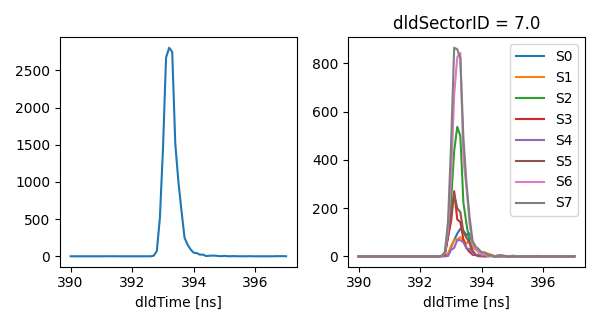

In [21]:
axes = ['dldSectorID', 'dldTime','dldPosX','dldPosY']
ranges = [[0,8], [390,460], [435,885], [445,895]]
bins = [8,700,225,225]
res_ph_peak_ns_align = sp_ph_peak.compute(bins=bins, axes=axes, ranges=ranges)

ph_peak_ns_align = res_ph_peak_ns_align.sel(dldTime=slice(390,397)).sum(('dldPosX','dldPosY'))

fig,ax = plt.subplots(1,2,figsize=(6,3.25), layout='tight')
ph_peak_ns_align.sum('dldSectorID').plot(ax=ax[0])
for i, item in enumerate(ph_peak_ns_align):
    item.plot(ax=ax[1], label=f'S{i}')
    plt.legend()
plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 71
    # variables        = 3
    chi-square         = 361552.790
    reduced chi-square = 5316.95280
    Akaike info crit   = 612.019326
    Bayesian info crit = 618.807366
    R-squared          = 0.98591730
[[Variables]]
    amplitude:  1360.69971 +/- 22.9196253 (1.68%) (init = 1360.1)
    center:     393.215749 +/- 0.00361420 (0.00%) (init = 393.2)
    sigma:      0.18580208 +/- 0.00361405 (1.95%) (init = 0.2)
    fwhm:       0.43753046 +/- 0.00851043 (1.95%) == '2.3548200*sigma'
    height:     2921.60705 +/- 49.2152636 (1.68%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = +0.5773


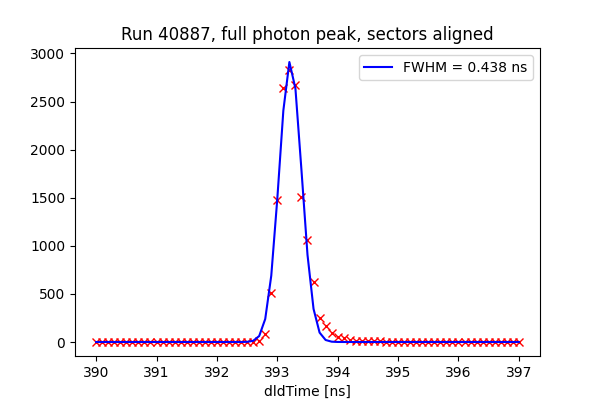

In [18]:
Gauss_mod = GaussianModel()

x=ph_peak_ns_align['dldTime']
y=ph_peak_ns_align.sum('dldSectorID')

pars = Gauss_mod.make_params(amplitude=1360.1, center=393.2, sigma=0.2)
# pars = Gauss_mod.guess(y, x=x)
out = Gauss_mod.fit(y, pars, x=x)

print(out.fit_report())
plt.figure(figsize=(6,4))
plt.plot(x,y, 'rx')
plt.plot(x,out.best_fit, "b", label="FWHM = {:.3f} ns".format(out.values['fwhm']))
plt.title(f'Run {run_number}, full photon peak, sectors aligned')
plt.legend(loc="best")
plt.xlabel("dldTime [ns]")
plt.show()

As we can see from the result of the last fit, after sector alignment, we have improved photon peak width by -3 ps

Same check can be done for every single sector in order to see/check that all sectors were properly corrected in time by their difference to 0 sector

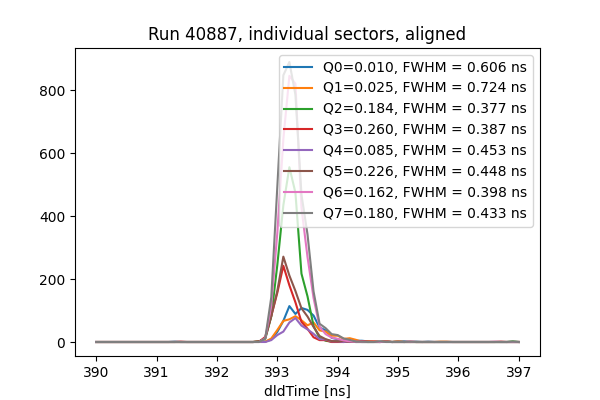

In [19]:
plt.figure(figsize=(6,4))
for i, item in enumerate(ph_peak_ns):
    x=ph_peak_ns_align['dldTime']
    y=item
    pars = Gauss_mod.make_params(amplitude=800.0, center=393.0, sigma=0.3)
    out = Gauss_mod.fit(y, pars, x=x)
    Center = 393.3899565
    Diff = "{:.3f}".format(Center - out.values['center'])
    FWHM = "{:.3f}".format(out.values['fwhm'])
    item.plot(label=f'S{i}={Diff}, FWHM = {FWHM} ns')
    plt.title(f'Run {run_number}, individual sectors, aligned')
    plt.legend()
plt.show()